#Atividade 01 de Resistência dos Materiais

Grupo:
1. Júlia Zoffoli Caçador.  202365520B
2. Robert Gonçalves Vieira de Souza. 202365505B
3. Rubia Danielle Viol. 202365515B

Professor Artur Hallack

**OBS: O pdf para o relatório e a validação dos cálculos realizados pela rotina computacional desenvolvida se encontra em anexo**

#Questão 1:
Desenvolva uma rotina computacional para determinar a intensidade e a direção de n forças coplanares concorrentes em um nó.

Qual o número n de forças que atuam no nó? 1

Você deseja inserir as forças em qual formato?
1. Inserir a intensidade e o ângulo com a horizontal para cada força
2. Inserir forças em coordenadas cartesianas
1

Insira a intensidade (em N) da 1ª força: 1
Insira o ângulo com relação ao eixo horizontal (em graus) da 1ª força: 1


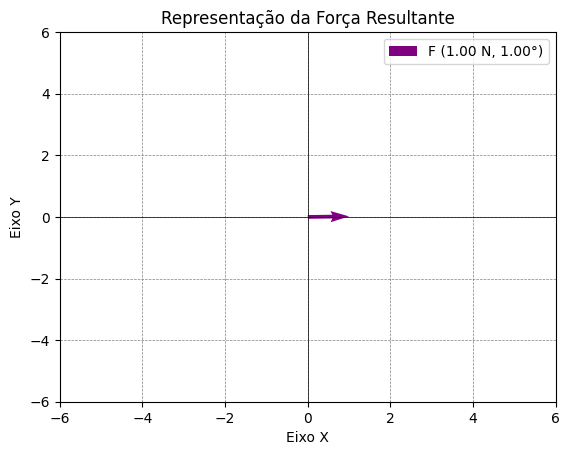


Força resultante: 1.00 N
Direção da resultante: 1.00 graus


In [ ]:
import math
import matplotlib.pyplot as plt

def separaComponentes (F, theta):
  theta = math.radians(theta)
  x = F * math.cos(theta)
  y = F * math.sin(theta)

  return x,y

def calculaResultante(forcas):
    somatorio_fx = 0
    somatorio_fy = 0

    for i in range (len(forcas)):
        somatorio_fx += float(forcas[i][0])
        somatorio_fy += float(forcas[i][1])

    intensidade_res = math.sqrt(somatorio_fx**2 + somatorio_fy**2)
    angulo_res = math.degrees(math.atan2(somatorio_fy, somatorio_fx))

    #para plotar a visualização da força resultante:
    plt.figure()
    plt.quiver(0, 0, somatorio_fx, somatorio_fy, angles='xy', scale_units='xy', scale=1, color='purple', label=f'F ({intensidade_res:.2f} N, {angulo_res:.2f}°)')
    plt.xlim(-intensidade_res-5, intensidade_res+5)
    plt.ylim(-intensidade_res-5, intensidade_res+5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title("Representação da Força Resultante")
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.show()

    print(f"\nForça resultante: {intensidade_res:.2f} N")
    print(f"Direção da resultante: {angulo_res:.2f} graus")

n = int(input("Qual o número n de forças que atuam no nó? "))

print ('\nVocê deseja inserir as forças em qual formato?')
print ('1. Inserir a intensidade e o ângulo com a horizontal para cada força')
print ('2. Inserir forças em coordenadas cartesianas')

modo = int(input())

MatCoord = [[0, 0] for _ in range(n)] # matriz com coordenadas x, y de todas as forças

for i in range (n):
  if modo == 1:
    F = float(input(f"\nInsira a intensidade (em N) da {i + 1}ª força: "))
    theta = float(input(f"Insira o ângulo com relação ao eixo horizontal (em graus) da {i + 1}ª força: "))
    MatCoord[i][0], MatCoord[i][1] = separaComponentes (F, theta)
  else:
    MatCoord[i][0] = float(input(f"\nInsira a coordenada x da {i + 1}ª força: "))
    MatCoord[i][1] = float(input(f"Insira a coordenada y da {i + 1}ª força: "))

calculaResultante(MatCoord)

##Questão 2:
Seja uma viga biapoiada genérica submetida a uma série de carregamentos. Escreva um programa computacional para calcular as reações de apoio em A e B.

In [ ]:
from sympy import symbols, integrate, Eq, solve
import matplotlib.pyplot as plt
import numpy as np

enumCarregamento = {
    1: "Retangular",
    2: "Triangular",
    3: "Trapézoidal"
}

enumApoio = {
    1: "Apoio de 1° gênero",
    2: "Apoio de 2° gênero",
    3: "Apoio de 3° gênero"
}

enumEstabilidade = {
    1: "Hipoestática",
    2: "Isostática",
    3: "Hiperestática"
}

NUM_EQUACOES = 3

# Classe que armazena informações sobre carregamentos pontuais e
# utiliza a função implementada na 1ª questão para decompor as componentes x e y de forças inclinadas
class CarregamentoPontual:
    def __init__(self, intensidade, posicao, angulacao):
      self.fy, self.fx = separaComponentes(intensidade, angulacao)
      self.posicao = posicao

class CarregamentoDistribuido:
    #funcao que calcula os coeficientes a e b para encontrar a função w(x) dado os pontos min e max dos carregamentos
    def funcao_w (self):
      a = (self.w[1] - self.w[0])/(self.p[1] - self.p[0])
      b = self.w[0] - a*self.p[0]
      funcao_w = a*self.x + b

      return funcao_w

    def __init__(self, tipo, w0, w1, p0, pf): #construtor
      self.tipo = enumCarregamento[tipo]
      self.w = [w0, w1] # w inicial e w final
      self.p = [p0, pf] #posição inicial e final

      self.x = symbols('x')
      self.resultante = integrate(self.funcao_w(), (self.x, self.p[0],self.p[1])) # calculo da integral de w(x) definida no intervalo de p0 a pf para encontrar a resultante
      self.centroide = integrate(self.funcao_w()*self.x, (self.x, self.p[0],self.p[1]))/self.resultante # calculo do centroide (posição em que a força resultante será aplicada)

class Apoio:
    def __init__(self, letra, tipo, posicao = 0): # construtor do apoio com todos os seus atributos
      self.letra = letra
      self.tipo = enumApoio[tipo]
      self.posicao = posicao

      self.fx = symbols(f'{letra}_x')
      self.fy = symbols(f'{letra}_y')

      if(self.tipo == enumApoio[1]):
        self.fx = 0

def gerar_numIncognitas(lista_apoios):
  numIncognitas = 0
  for i in range (len(lista_apoios)):
    if lista_apoios[i].tipo == enumApoio[1]: # apoio de 1º gênero: +1 incógnita
      numIncognitas += 1
    elif lista_apoios[i].tipo == enumApoio[2]: # apoio de 2º gênero: +2 incógnita
      numIncognitas += 2
    elif lista_apoios[i].tipo == enumApoio[3]: # apoio de 3º gênero: +3 incógnita
      numIncognitas += 3
  return numIncognitas

def get_estabilidade(lista_apoios): # cálculo da estabilidade da viga com base no número de incógnitas e de equações
  global NUM_EQUACOES
  numIncognitas = gerar_numIncognitas(lista_apoios)
  if numIncognitas > NUM_EQUACOES:
    return enumEstabilidade[3]
  elif numIncognitas == NUM_EQUACOES:
    return enumEstabilidade[2]
  else:
    return enumEstabilidade[1]

def calcula_reacoes(lista_carregamentos, lista_apoios):
  vars_fx = []
  vars_fy = []
  M = 0

  soma = 0

  for i in range(len(lista_apoios)):
    if(lista_apoios[i].tipo != enumApoio[1]): #2º e 3º gênero: acrescenta somatório de fx
      vars_fx.append(lista_apoios[i].fx)

    vars_fy.append(lista_apoios[i].fy) # somatório em fy

    if(lista_apoios[i].tipo == enumApoio[3]):
      M = symbols('M')
      soma += M

    if lista_apoios[i].tipo != enumApoio[3] and i > 0: # momento para apoios
      soma += lista_apoios[i].fy*(lista_apoios[i].posicao - lista_apoios[0].posicao)

  for carregamento in lista_carregamentos: # momento para carregamento
    soma -= carregamento.fy*carregamento.posicao

  fx = Eq(sum(vars_fx) - sum(lista_carregamentos[i].fx for i in range(len(lista_carregamentos))), 0) # soma de todos fx - soma dos carregamentos em fx
  fy = Eq(sum(vars_fy) - sum(lista_carregamentos[i].fy for i in range(len(lista_carregamentos))), 0) # soma de todos fy - soma dos carregamentos em fy
  momento = Eq(soma, 0) # soma do momento = zero

  solucao = solve((fx, fy, momento), *vars_fx, *vars_fy, M) #solução
  return solucao

def plotar_viga(lista_carregamentos_distribuidos, lista_carregamentos_pontuais, lista_apoios, solucao):
    plt.figure(figsize=(12, 6))

    # Plota viga
    comprimento = lista_apoios[-1].posicao  # Pega a posição do último apoio
    plt.plot([0, comprimento], [0, 0], 'k-', linewidth=2)

    # Plota apoios
    for apoio in lista_apoios:
        if apoio.tipo == enumApoio[1]:  # Apoio de 1º gênero
            plt.plot([apoio.posicao], [0], 'k^', markersize=10, label=f'Apoio {apoio.letra} de 1° gênero')
        elif apoio.tipo == enumApoio[2]:  # Apoio de 2º gênero
            plt.plot([apoio.posicao], [0], 'ko', markersize=10, label=f'Apoio {apoio.letra} de 2° gênero')
        elif apoio.tipo == enumApoio[3]:  # Apoio de 3º gênero
            plt.plot([apoio.posicao], [0], 'ks', markersize=10, label=f'Apoio {apoio.letra} de 3° gênero')

    # Plota cargas
    for carga in lista_carregamentos_pontuais:
        plt.arrow(carga.posicao, 2, 0, -1.5,
                  head_width=0.1, head_length=0.2, fc='blue', ec='blue', label='Carga Pontual')

    for carga in lista_carregamentos_distribuidos:
        x = np.linspace(carga.p[0], carga.p[1], 100)
        if carga.tipo == "Retangular":
            y = np.ones_like(x) * carga.w[0]
            label = 'Carga Distribuída Retangular'
        elif carga.tipo == "Triangular":
            y = np.linspace(carga.w[0], carga.w[1], 100)
            label = 'Carga Distribuída Triangular'
        else:
            y = np.linspace(carga.w[0], carga.w[1], 100)
            label = 'Carga Distribuída Trapézoidal'
        plt.fill_between(x, 0, -y / 1000, alpha=0.3, label=label)

    # Plota reações nos apoios
    escala = 1  # Fator de escala para as reações
    for apoio in lista_apoios:
      plt.arrow(apoio.posicao, 0, 0, 2, head_width=0.1, head_length=0.2, fc='red', ec='red')  # Seta vertical

      if apoio.tipo != enumApoio[1]:
        plt.arrow(apoio.posicao - 2.5, 0, 2, 0, head_width=0.1, head_length=0.2, fc='red', ec='red')  # Seta horizontal

    plt.grid(True)
    plt.axis('equal')
    plt.title('Análise da Viga')
    plt.xlabel('Posição (m)')
    plt.ylabel('Carga (N/m)')
    plt.legend()
    plt.show()


TIPOS DE CARREGAMENTO:
Insira quantos carregamentos pontuais existem na sua viga: 0
Insira quantos carregamentos distribuídos existem na sua viga: 1

CARREGAMENTO DISTRIBUIDO:

TIPOS DE CARREGAMENTOS DISTRIBUIDOS:
1. Retangular
2. Triangular
3. Trapézoidal

Insira o número correspondente ao tipo do 1° carregamento distribuido: 2
Insira w0 do 1° carregamento distribuido: 600
Insira w1 do 1° carregamento distribuido: 0
Insira a posição inicial do 1° carregamento distribuido: 0
Insira a posição final do 1° carregamento distribuido: 6

APOIOS:
Insira quantos apoios existem na sua viga: 2

TIPOS DE APOIO:
1. Apoio de 1° gênero
2. Apoio de 2° gênero
3. Apoio de 3° gênero

Insira o número correspondente ao tipo do Apoio A: 2
Insira a posição do Apoio A: 0

Insira o número correspondente ao tipo do Apoio B: 1
Insira a posição do Apoio B: 6


RESULTADO:

Carregamento 1:
Fx: 0.00
Fy: 1800.00
Posição: 2.00


Reações nos apoios:
A_x: 0.00
A_y: 1200.00
B_y: 600.00



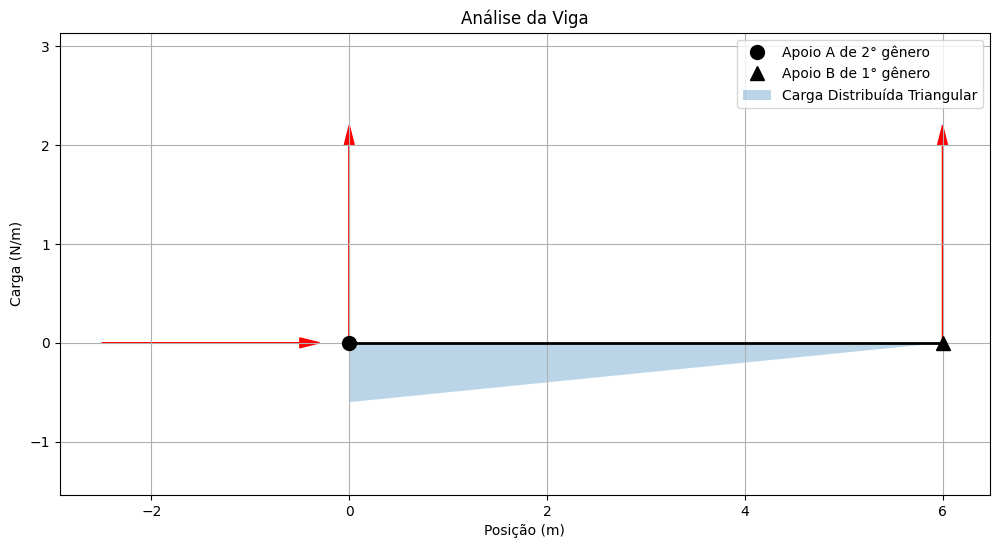

In [ ]:
import string
letras = string.ascii_uppercase[:100]

#instruções para o usuário inserir a configuração de viga que desejar
print ("TIPOS DE CARREGAMENTO:")
carregamentos_pontuais = int(input("Insira quantos carregamentos pontuais existem na sua viga: "))
carregamentos_distribuidos = int(input("Insira quantos carregamentos distribuídos existem na sua viga: "))

lista_carregamentos_pontuais = []
lista_carregamentos_distribuidos = []

if(carregamentos_pontuais > 0):
  print("\nCARREGAMENTO PONTUAL:")

  for i in range (carregamentos_pontuais):
    intensidade = float(input(f"Insira a intensidade da {i+1}° carga pontual: "))
    posicao = float(input(f"Insira a posição da {i+1}° carga pontual: "))
    angulacao = float(input(f"Insira a angulação em relação ao eixo y da {i+1}° carga pontual: "))

    lista_carregamentos_pontuais.append(CarregamentoPontual(intensidade, posicao, angulacao))

print ("\nCARREGAMENTO DISTRIBUIDO:")
print ("\nTIPOS DE CARREGAMENTOS DISTRIBUIDOS:")
print ("1. Retangular")
print ("2. Triangular")
print ("3. Trapézoidal")

w0, w1, p0, p1 = 0, 0, 0, 0
for i in range (carregamentos_distribuidos):
  tipo = int(input(f"\nInsira o número correspondente ao tipo do {i+1}° carregamento distribuido: "))

  if(tipo == 1):
    w0 = float(input(f"Insira w do {i+1}° carregamento distribuido: "))
    w1 = w0
  else:
    w0 = float(input(f"Insira w{i} do {i+1}° carregamento distribuido: "))
    w1 = float(input(f"Insira w{i+1} do {i+1}° carregamento distribuido: "))

  p0 = float(input(f"Insira a posição inicial do {i+1}° carregamento distribuido: "))
  pf = float(input(f"Insira a posição final do {i+1}° carregamento distribuido: "))

  lista_carregamentos_distribuidos.append(CarregamentoDistribuido(tipo, w0, w1, p0, pf))

lista_carregamentos = [CarregamentoPontual(lista_carregamentos_distribuidos[i].resultante, lista_carregamentos_distribuidos[i].centroide, 0) for i in range (carregamentos_distribuidos)] + lista_carregamentos_pontuais

print ("\nAPOIOS:")
num_apoios = int(input("Insira quantos apoios existem na sua viga: "))
lista_apoios = []

print ("\nTIPOS DE APOIO:")
print ("1. Apoio de 1° gênero")
print ("2. Apoio de 2° gênero")
print ("3. Apoio de 3° gênero")

for i in range (num_apoios):
  tipo_apoio = int(input(f"\nInsira o número correspondente ao tipo do Apoio {letras[i]}: "))
  posicao = float(input(f"Insira a posição do Apoio {letras[i]}: "))

  lista_apoios.append(Apoio(letras[i], tipo_apoio, posicao))

if gerar_numIncognitas(lista_apoios) != NUM_EQUACOES:
  print(f"ERRO: Vigas Hiperestáticas e/ou Hipoestáticas não podem ser calculadas. A sua é {get_estabilidade(lista_apoios)}")
  exit(1)
else:
  solucao = calcula_reacoes(lista_carregamentos, lista_apoios) #calculo das reações de apoio

  #impressão dos resultados
  print("\n\n====================================")
  print(f"RESULTADO:")
  print("====================================")

  for i in range(len(lista_carregamentos)):
      print(f"\nCarregamento {i+1}:")
      print(f"Fx: {lista_carregamentos[i].fx:.2f}")
      print(f"Fy: {lista_carregamentos[i].fy:.2f}")
      print(f"Posição: {lista_carregamentos[i].posicao:.2f}")

  print("\n====================================")
  print("\nReações nos apoios:")
  for dado in solucao:
      print(f"{dado}: {solucao[dado]:.2f}")
  print("\n====================================")

plotar_viga(lista_carregamentos_distribuidos, lista_carregamentos_pontuais, lista_apoios, solucao)

#Questão 3:
Desenvolver um programa para análise e cálculo de treliças planas isostáticas.

In [ ]:
import matplotlib.pyplot as plt

def plota_plano_cartesiano(lista_nos = [], lista_apoios = [], lista_barras = []):

    tamx, tamy = 5, 5
    if lista_nos:
        tamx = max(lista_nos, key=lambda no: no.x).x + 1
        tamy = max(lista_nos, key=lambda no: no.y).y + 1

    # Criando um plano cartesiano pontilhado
    plt.figure(figsize=(6, 6))

    # Configurando o gráfico
    plt.grid(True, which='both', axis='both', linestyle=':', color='black', alpha=0.7)

    # Definindo os limites do gráfico
    plt.xlim(-0.5, tamx)
    plt.ylim(-0.5, tamy)

    # Plotagem dos nós
    if lista_nos != []:
        for i, no in enumerate(lista_nos):
            plt.plot(no.x, no.y, 'ro')  # Plota o nó como um ponto vermelho
            plt.text(no.x + 0.01, no.y + 0.01, str(i+1), fontsize=12, color='red')  # Adiciona o número do nó

    # Plotagem das barras
    if lista_barras != []:
        for barra in lista_barras:
            no1, no2 = barra
            x = [no1.x, no2.x]
            y = [no1.y, no2.y]
            plt.plot(x, y, 'k-')

    # Plotagem dos apoios
    if lista_apoios != []:
        for apoio in lista_apoios:
            x = apoio[0].x
            y = apoio[0].y

            if apoio[1] == 1:
                plt.plot(x, y - 0.01, 'k^')
            elif apoio[1] == 2:
                plt.plot(x, y - 0.01, 'ko')

    # Exibindo o gráfico
    plt.show(block=False)  # Evita bloquear o código
    plt.pause(0.1)  # Dá um tempo para renderizar o gráfico

In [ ]:
from sympy import symbols, solve, Matrix, linsolve
import numpy as np
from math import sqrt, atan2, degrees

class No:
    def __init__(self, x, y, fx=0, fy=0):
        self.x = x
        self.y = y
        self.fx = fx
        self.fy = fy
        self.barras = []
        self.restricao_x = False
        self.restricao_y = False
        self.reacao_x = 0
        self.reacao_y = 0

    def adicionar_barra(self, barra):
        self.barras.append(barra)

    def definir_apoio(self, restricao_x=False, restricao_y=False):
        self.restricao_x = restricao_x
        self.restricao_y = restricao_y

class Barra:
    def __init__(self, no1, no2):
        self.no1 = no1
        self.no2 = no2
        self.comprimento = self.calcular_comprimento()
        self.forca = 0
        self.angulo = self.calcular_angulo()
        no1.adicionar_barra(self)
        no2.adicionar_barra(self)

    def calcular_comprimento(self):
        dx = self.no2.x - self.no1.x
        dy = self.no2.y - self.no1.y
        return sqrt(dx**2 + dy**2)

    def calcular_angulo(self):
        dx = self.no2.x - self.no1.x
        dy = self.no2.y - self.no1.y
        return atan2(dy, dx)

    def obter_cossenos_diretores(self): # quanto da força na barra está direcionado em cada direção
        cos_x = (self.no2.x - self.no1.x) / self.comprimento
        cos_y = (self.no2.y - self.no1.y) / self.comprimento
        return cos_x, cos_y

class Trelica:
    def __init__(self):
        self.nos = []
        self.barras = []

    def adicionar_no(self, x, y, fx=0, fy=0):
        no = No(x, y, fx, fy)
        self.nos.append(no)
        return no

    def adicionar_barra(self, no1, no2):
        barra = Barra(no1, no2)
        self.barras.append(barra)
        return barra

    def validar_isostatica(self):
        num_barras = len(self.barras)
        num_reacoes = sum(1 for no in self.nos if no.restricao_x) + \
                     sum(1 for no in self.nos if no.restricao_y)
        num_nos = len(self.nos)

        if num_barras + num_reacoes != 2 * num_nos:
            raise ValueError(f"Treliça não é isostática: b + r = {num_barras + num_reacoes} ≠ 2n = {2 * num_nos}")
        return True

    def resolver(self):
        """
        Resolve o sistema de equações da treliça usando matriz de coeficientes.
        """
        self.validar_isostatica()

        n_equacoes = 2 * len(self.nos)  # Duas equações por nó (x e y)
        n_incognitas = len(self.barras) + sum(no.restricao_x + no.restricao_y for no in self.nos)

        # Criar matriz de coeficientes A e vetor de termos independentes b
        A = Matrix.zeros(n_equacoes, n_incognitas)
        b = Matrix.zeros(n_equacoes, 1)

        eq = 0  # Contador de equações
        for no in self.nos:
            # Equilíbrio em X
            col = 0  # Contador de colunas

            # Contribuição das barras
            for barra in self.barras:
              cos_x, _ = barra.obter_cossenos_diretores()  # Obtém o cosseno diretor no eixo X
              if barra.no1 == no:
                  A[eq, col] = -cos_x  # Se o nó é no1, a contribuição da barra será negativa
              elif barra.no2 == no:
                  A[eq, col] = cos_x   # Se o nó é no2, a contribuição será positiva
              col += 1

            # Contribuição das reações
            for n in self.nos:
                if n == no:
                    if n.restricao_x:
                        A[eq, col] = 1
                        col += 1
                    if n.restricao_y:
                        col += 1
                else:
                    if n.restricao_x:
                        col += 1
                    if n.restricao_y:
                        col += 1

            b[eq] = -no.fx  # Força externa em X
            eq += 1

            # Equilíbrio em Y
            col = 0

            # Contribuição das barras
            for barra in self.barras:
                _, cos_y = barra.obter_cossenos_diretores()
                if barra.no1 == no:
                    A[eq, col] = -cos_y
                elif barra.no2 == no:
                    A[eq, col] = cos_y
                col += 1

            # Contribuição das reações
            for n in self.nos:
                if n == no:
                    if n.restricao_x:
                        col += 1
                    if n.restricao_y:
                        A[eq, col] = 1
                        col += 1
                else:
                    if n.restricao_x:
                        col += 1
                    if n.restricao_y:
                        col += 1

            b[eq] = -no.fy  # Força externa em Y
            eq += 1

        # Resolver sistema linear
        solucao = list(linsolve((A, b)))[0]

        # Atualizar forças nas barras
        for i, barra in enumerate(self.barras):
            barra.forca = float(solucao[i])

        # Atualizar reações de apoio
        idx = len(self.barras)
        for no in self.nos:
            if no.restricao_x:
                no.reacao_x = float(solucao[idx])
                idx += 1
            if no.restricao_y:
                no.reacao_y = float(solucao[idx])
                idx += 1

    # Impressão dos resultados
    def imprimir_resultados(self):
      print("\n\n====================================")
      print(f"RESULTADO:")
      print("====================================")

      print("\nForças nas barras:")
      for i, barra in enumerate(self.barras):
          estado = "Tração" if barra.forca > 0 else "Compressão"
          print(f"Barra {i}: {abs(barra.forca):.2f} kN ({estado})")

      print("\n====================================")
      print("\nReações de apoio:")
      for i, no in enumerate(self.nos):
          if no.restricao_x or no.restricao_y:
              print(f"\nNó {i}:")
              if no.restricao_x:
                  print(f"Rx = {no.reacao_x:.2f} kN")
              if no.restricao_y:
                  print(f"Ry = {no.reacao_y:.2f} kN")

      print("\n====================================")

Insira o número de nós da sua treliça: 10
Insira quantos apoios existem na sua viga: 2
Insira o número de barras da sua treliça: 17

Com base no plano cartesiano abaixo, insira as coordenadas de cada nó da sua treliça (x, y).
Insira as coordenadas x do nó 1: 0
Insira as coordenadas y do nó 1: 0
O nó 1 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


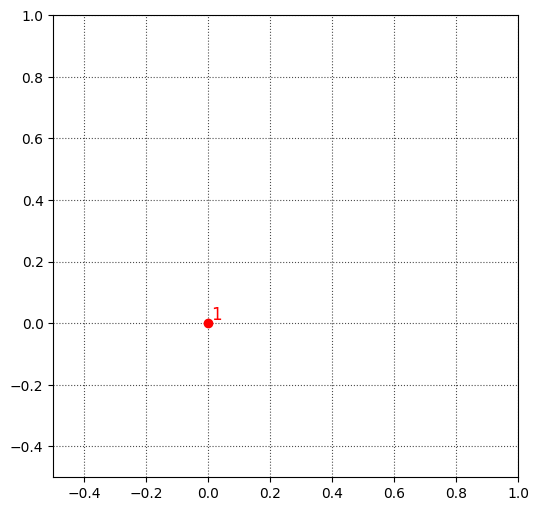


Insira as coordenadas x do nó 2: 2
Insira as coordenadas y do nó 2: 0
O nó 2 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


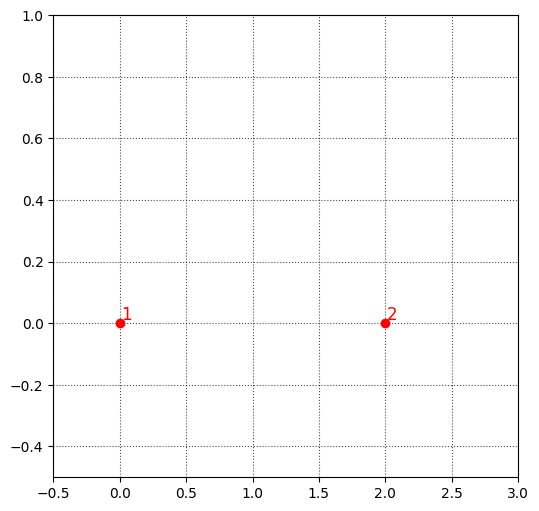


Insira as coordenadas x do nó 3: 4
Insira as coordenadas y do nó 3: 0
O nó 3 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


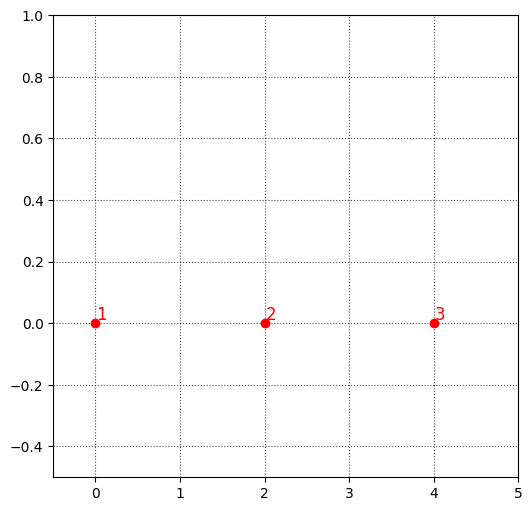


Insira as coordenadas x do nó 4: 6
Insira as coordenadas y do nó 4: 0
O nó 4 apresenta alguma carga pontual? (1: Sim, 2: Não): 1
Insira o valor Fx da carga pontual no nó 4: 0
Insira o valor Fy da carga pontual no nó 4: -20


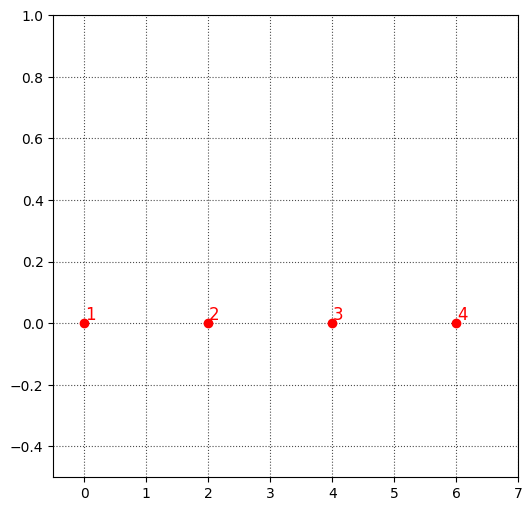


Insira as coordenadas x do nó 5: 8
Insira as coordenadas y do nó 5: 0
O nó 5 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


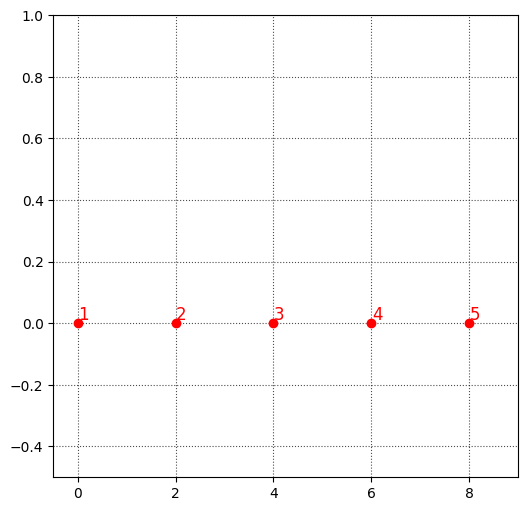


Insira as coordenadas x do nó 6: 0
Insira as coordenadas y do nó 6: 2
O nó 6 apresenta alguma carga pontual? (1: Sim, 2: Não): 1
Insira o valor Fx da carga pontual no nó 6: 50
Insira o valor Fy da carga pontual no nó 6: 0


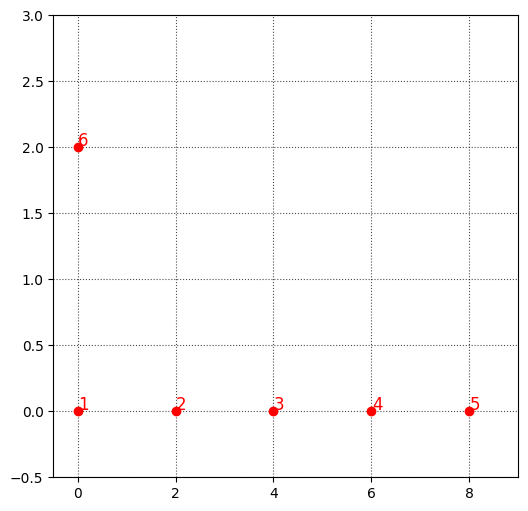


Insira as coordenadas x do nó 7: 2
Insira as coordenadas y do nó 7: 2
O nó 7 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


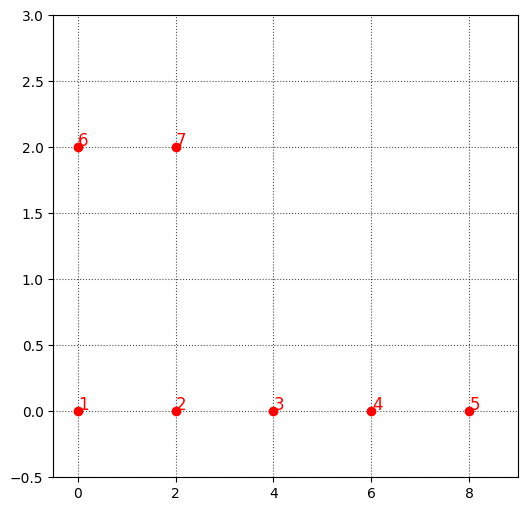


Insira as coordenadas x do nó 8: 4
Insira as coordenadas y do nó 8: 2
O nó 8 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


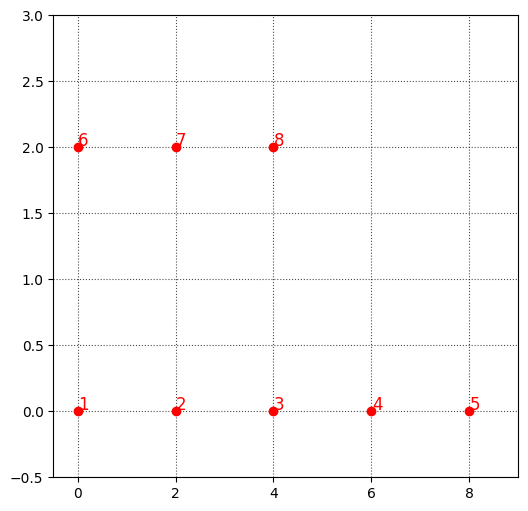


Insira as coordenadas x do nó 9: 6
Insira as coordenadas y do nó 9: 2
O nó 9 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


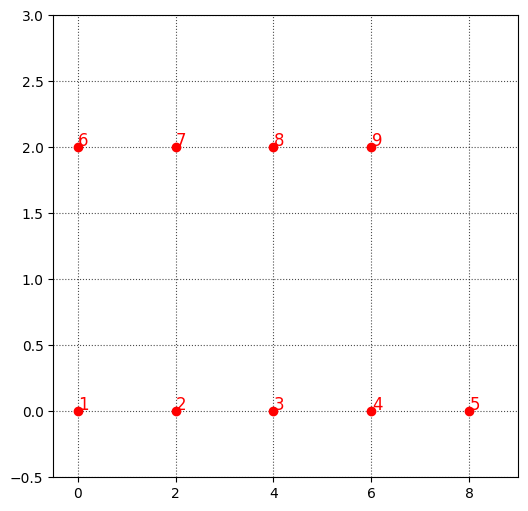


Insira as coordenadas x do nó 10: 8
Insira as coordenadas y do nó 10: 2
O nó 10 apresenta alguma carga pontual? (1: Sim, 2: Não): 2


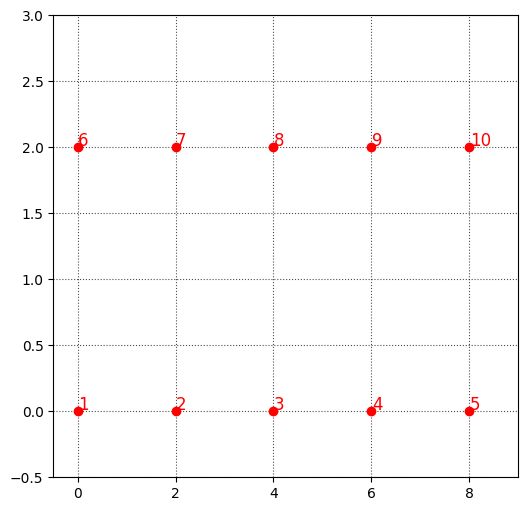



Tipos de Apoio
1. Apoio de 1° gênero (Móvel)
2. Apoio de 2° gênero (Fixo)

Insira o tipo do apoio A: 1
Insira o nó que estará o apoio A: 1
Insira o tipo do apoio B: 2
Insira o nó que estará o apoio B: 5


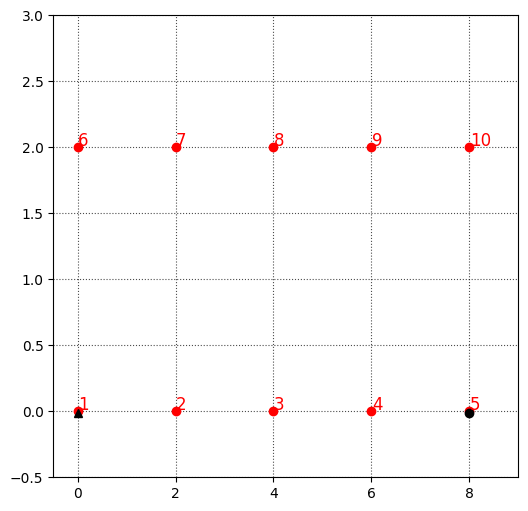



Com base no plano cartesiano abaixo, insira as barra com base no nós adicionados.
Insira o primeiro nó da barra 1: 1
Insira o segundo nó da barra 1: 2


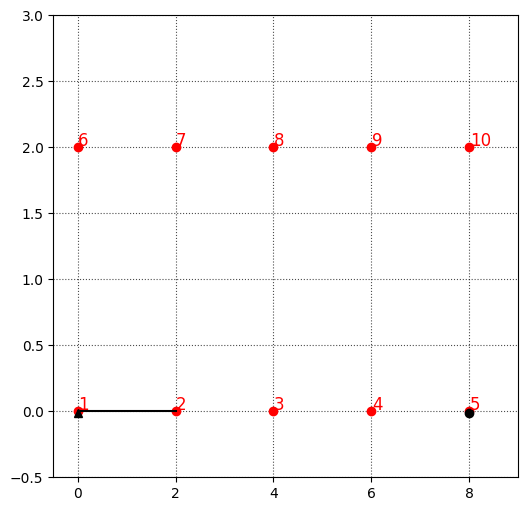


Insira o primeiro nó da barra 2: 2
Insira o segundo nó da barra 2: 3


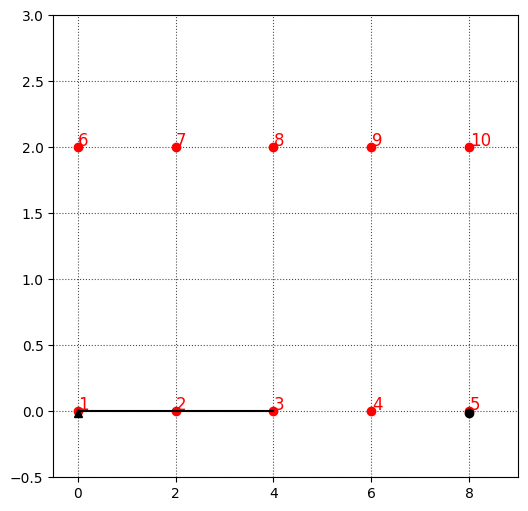


Insira o primeiro nó da barra 3: 3
Insira o segundo nó da barra 3: 4


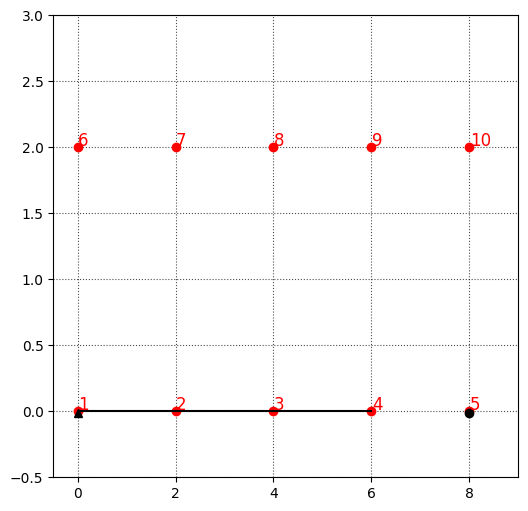


Insira o primeiro nó da barra 4: 4
Insira o segundo nó da barra 4: 5


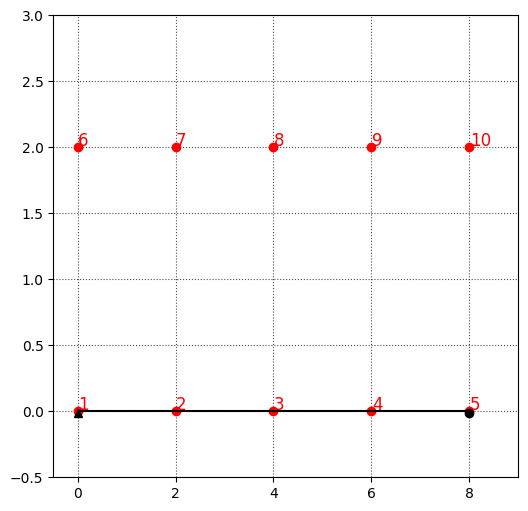


Insira o primeiro nó da barra 5: 5
Insira o segundo nó da barra 5: 10


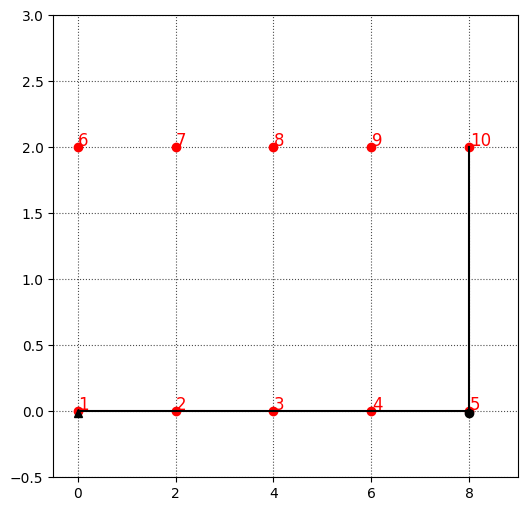


Insira o primeiro nó da barra 6: 10
Insira o segundo nó da barra 6: 9


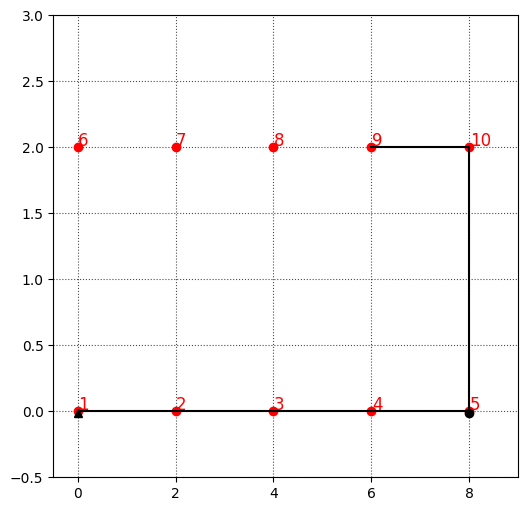


Insira o primeiro nó da barra 7: 9
Insira o segundo nó da barra 7: 8


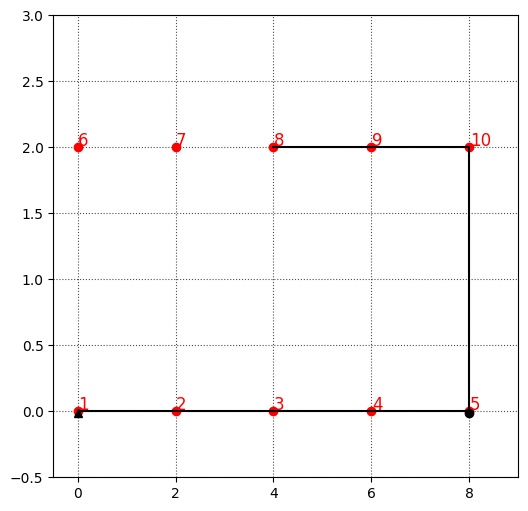


Insira o primeiro nó da barra 8: 8
Insira o segundo nó da barra 8: 7


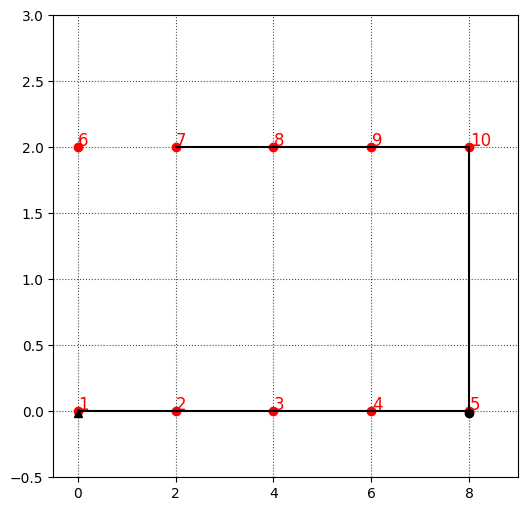


Insira o primeiro nó da barra 9: 7
Insira o segundo nó da barra 9: 6


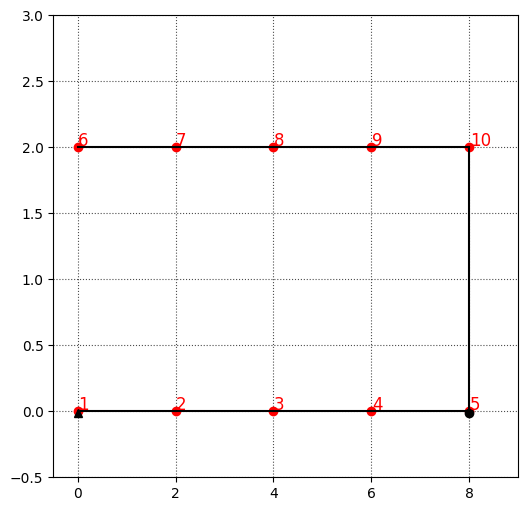


Insira o primeiro nó da barra 10: 6
Insira o segundo nó da barra 10: 1


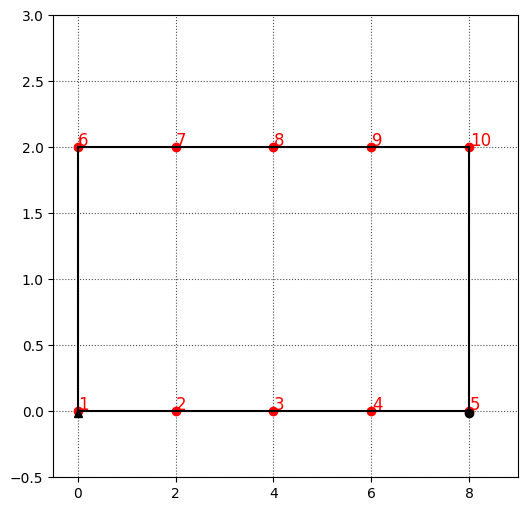


Insira o primeiro nó da barra 11: 1
Insira o segundo nó da barra 11: 7


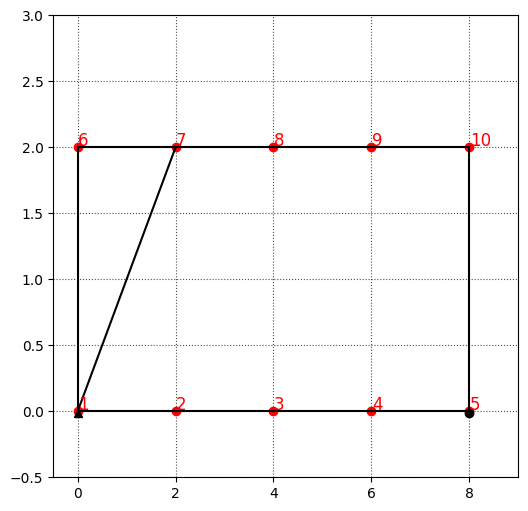


Insira o primeiro nó da barra 12: 7
Insira o segundo nó da barra 12: 2


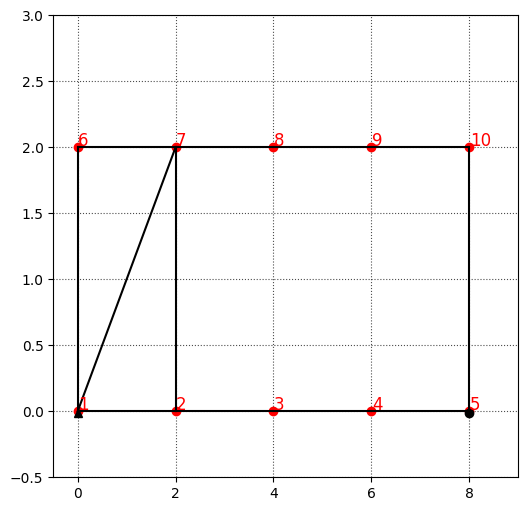


Insira o primeiro nó da barra 13: 2
Insira o segundo nó da barra 13: 8


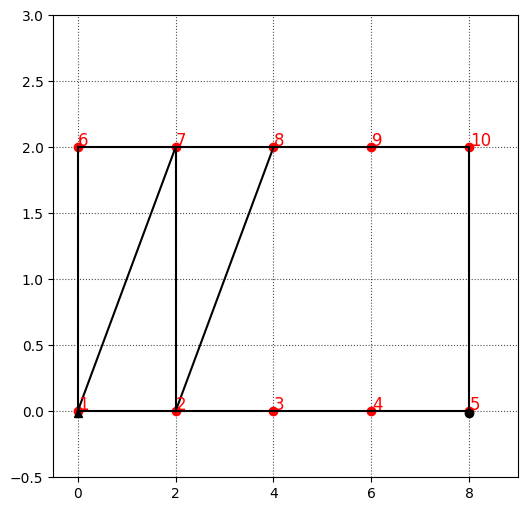


Insira o primeiro nó da barra 14: 8
Insira o segundo nó da barra 14: 3


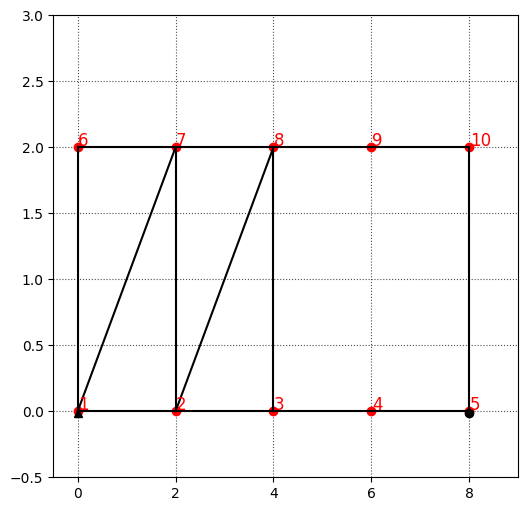


Insira o primeiro nó da barra 15: 8
Insira o segundo nó da barra 15: 4


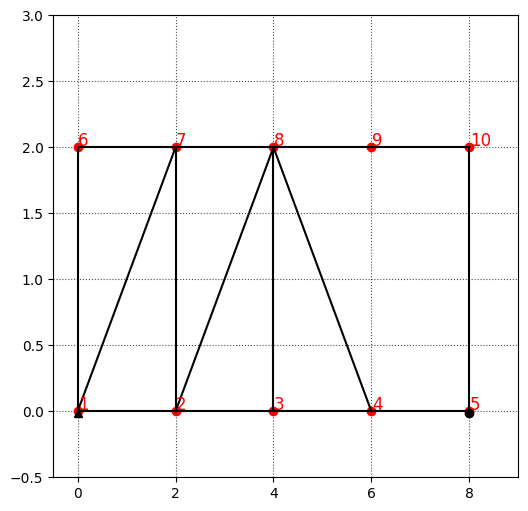


Insira o primeiro nó da barra 16: 4
Insira o segundo nó da barra 16: 9


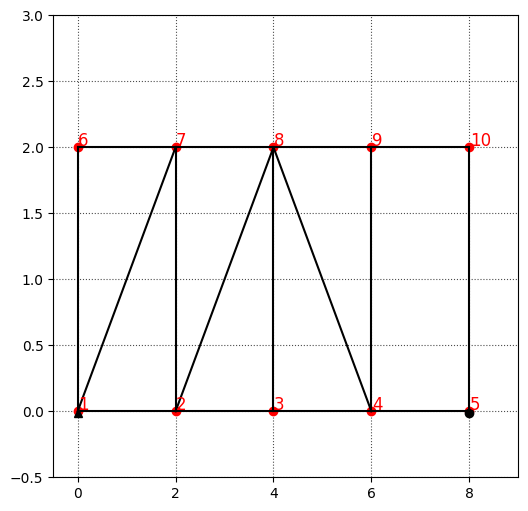


Insira o primeiro nó da barra 17: 9
Insira o segundo nó da barra 17: 5


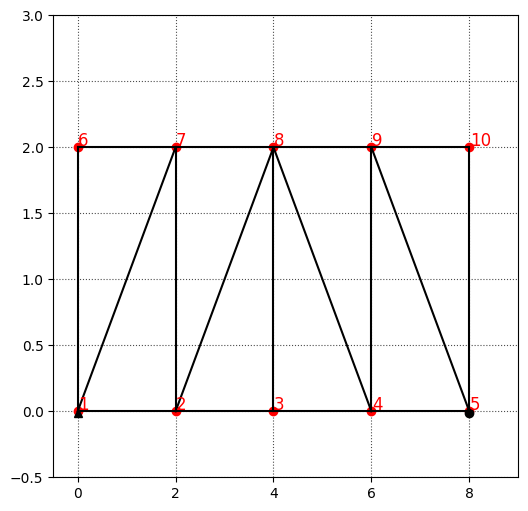




RESULTADO:

Forças nas barras:
Barra 0: 7.50 kN (Tração)
Barra 1: 15.00 kN (Tração)
Barra 2: 15.00 kN (Tração)
Barra 3: 22.50 kN (Tração)
Barra 4: 0.00 kN (Compressão)
Barra 5: 0.00 kN (Compressão)
Barra 6: 27.50 kN (Tração)
Barra 7: 42.50 kN (Tração)
Barra 8: 50.00 kN (Tração)
Barra 9: 0.00 kN (Compressão)
Barra 10: 10.61 kN (Compressão)
Barra 11: 7.50 kN (Tração)
Barra 12: 10.61 kN (Compressão)
Barra 13: 0.00 kN (Compressão)
Barra 14: 10.61 kN (Tração)
Barra 15: 27.50 kN (Compressão)
Barra 16: 38.89 kN (Tração)


Reações de apoio:

Nó 0:
Ry = -7.50 kN

Nó 4:
Rx = -50.00 kN
Ry = 27.50 kN



In [ ]:
import string
letras = string.ascii_uppercase[:100]

trelica = Trelica()
lista_nos = []
lista_apoios = []
lista_barras = []

num_nos = int(input("Insira o número de nós da sua treliça: "))
num_apoios = int(input("Insira quantos apoios existem na sua viga: "))
num_barras = int(input("Insira o número de barras da sua treliça: "))

# Definindo os nós
print("\nCom base no plano cartesiano abaixo, insira as coordenadas de cada nó da sua treliça (x, y).")
for i in range(num_nos):
  x = float(input(f"Insira as coordenadas x do nó {i+1}: "))
  y = float(input(f"Insira as coordenadas y do nó {i+1}: "))

  res = int(input(f"O nó {i+1} apresenta alguma carga pontual? (1: Sim, 2: Não): "))
  if res == 1:
    Fx = float(input(f"Insira o valor Fx da carga pontual no nó {i+1}: "))
    Fy = float(input(f"Insira o valor Fy da carga pontual no nó {i+1}: "))

    lista_nos.append(trelica.adicionar_no(x, y, Fx, Fy))
  elif res == 2:
    lista_nos.append(trelica.adicionar_no(x, y))
  else:
    raise ValueError("Digite um dígito válido!")

  plota_plano_cartesiano(lista_nos)
  print()

# Definindo os apoios
print("\nTipos de Apoio")
print("1. Apoio de 1° gênero (Móvel)")
print("2. Apoio de 2° gênero (Fixo)\n")

for i in range(num_apoios):
  tipo = int(input(f"Insira o tipo do apoio {letras[i]}: "))
  no = int(input(f"Insira o nó que estará o apoio {letras[i]}: ")) - 1

  if tipo == 1:
    lista_nos[no].definir_apoio(False, True) # Apoio móvel (apenas restrição em y)
  elif tipo == 2:
    lista_nos[no].definir_apoio(True, True) # Apoio fixo (restrição em x e y)
  else:
    raise ValueError("Digite um dígito válido!")

  lista_apoios.append((lista_nos[no], tipo))

plota_plano_cartesiano(lista_nos, lista_apoios)
print()

# Definindo barras
print("\nCom base no plano cartesiano abaixo, insira as barra com base no nós adicionados.")
for i in range(num_barras):
  no1 = int(input(f"Insira o primeiro nó da barra {i+1}: ")) - 1
  no2 = int(input(f"Insira o segundo nó da barra {i+1}: ")) - 1

  lista_barras.append((lista_nos[no1], lista_nos[no2]))
  trelica.adicionar_barra(lista_nos[no1], lista_nos[no2])

  plota_plano_cartesiano(lista_nos, lista_apoios, lista_barras)
  print()

# Resolver a treliça
trelica.resolver()

# Imprimir resultados
trelica.imprimir_resultados()
